# Parte 1: Tensores

### Tensores

Tensores são uma estrutura de dados especializada, parecidos com vetores/matrizes. No PyTorch, tensores são utilizados para codificar entradas(inputs) e saídas(outputs) em um modelo, e também os parâmetros desse modelo.

<img src=img/2-tensor-1.png>

Tensores no PyTorch são similares a `ndarray` no NumPy, com a diferença que tensores podem ser executados em GPUs. Caso sejam utilizados em CPUs, tensores e `ndarrays` podem compartilhar o mesmo endereço na memória, eliminando assim a necessidade de copiar os dados de um para o outro (leia mais sobre isso pesquisando por `bridge-to-np-label`). Tensores são também optimizados para diferenciação automática. Caso você tenha familiaridade com a API NumPy de `ndarrrays`, você não terá nenhum problema em utilizar tensores no PyTorch.

## Inicializando tensores

Tensores podem ser inicializados de várias maneiras: os dados podem ser passados diretamente (o data type é inferido automaticamente pelo PyTorch); por meio de um `np.array`; por meio de outro tensor; ou ainda com valores constantes ou aleatórios.

Veja os exemplos a seguir:

In [96]:
%matplotlib inline
import torch
import numpy as np

#### Inicialização direta

In [3]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

#### Inicialização a partir de array NumPy

In [4]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

print(f"Valor do np_array (Numpy): \n {np_array} \n")
print(f"Valor do tensor (pytorch): \n {x_np} \n")

# Observe que alterações no array numpy são propagadas para o tensor, visto que compartilham o mesmo endereço na memória!

np.multiply(np_array, 2, out=np_array)

print(f"Valor do np_array depois da multiplicação: \n {np_array} \n")
print(f"Valor do tensor depois da multiplicação: \n {x_np} \n")

Valor do np_array (Numpy): 
 [[1 2]
 [3 4]] 

Valor do tensor (pytorch): 
 tensor([[1, 2],
        [3, 4]]) 

Valor do np_array depois da multiplicação: 
 [[2 4]
 [6 8]] 

Valor do tensor depois da multiplicação: 
 tensor([[2, 4],
        [6, 8]]) 



#### Inicialização a partir de outro tensor

In [6]:
x_ones = torch.ones_like(x_data) # mantém as propriedades do x_data
print(f"Tensor unitário: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # sobreescreve as propriedades do x_data
print(f"Tensor aleatório: \n {x_rand} \n")

Tensor unitário: 
 tensor([[1, 1],
        [1, 1]]) 

Tensor aleatório: 
 tensor([[0.6456, 0.4287],
        [0.0766, 0.9469]]) 



#### Inicialização com valores constantes/aleatórios

A variável `shape` abaixo é um _tuplo_ que armazena as dimensões do tensor. Veja no exemplo abaixo o output dos tensores, conforme criados com as funções `rand`, `ones` e `zeros`:

In [7]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Tensor aleatório: \n {rand_tensor} \n")
print(f"Tensor unitário: \n {ones_tensor} \n")
print(f"Tensor zero: \n {zeros_tensor}")

Tensor aleatório: 
 tensor([[0.7274, 0.7206, 0.9310],
        [0.9329, 0.8290, 0.4387]]) 

Tensor unitário: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Tensor zero: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


## Atributos de um tensor

Os atributos do tensor descrevem sua forma (shape), tipo de dados e o dispositivo no qual o mesmo está armazenado.

In [98]:
tensor = torch.rand(3,4)

print(f"Forma do tensor: {tensor.shape}")
print(f"Tipo de dados do tensor: {tensor.dtype}")
print(f"Dispositivo armazenando o tensor: {tensor.device}")

Forma do tensor: torch.Size([3, 4])
Tipo de dados do tensor: torch.float32
Dispositivo armazenando o tensor: cpu


## Operações em tensores

O PyTorch possui funcionalidades para mais de 100 operações com tensores, incluindo operações aritméticas, de álgebra linear e de manipulação de matrizes. Para saber mais, clique [aqui](https://pytorch.org/docs/stable/torch.html) (em inglês).

Cada uma dessas operações podem ser executadas no GPU (normalmente bem mais rápido do que em CPUs). O PyTorch pode usar a library CUDA da Nvidia, obtendo assim uma vantagem significativa com placas de vídeo.

Tensores são criados inicialmente no CPU, mas podem ser movidos por meio do método `.to()`, conforme exemplo abaixo. Lembre-se que para tensores maiores, essa operação possui um custo alto em tempo e memória.

In [99]:
# Caso possível, podemos mover o tensor para o acelerador GPU.
if torch.cuda.is_available():
    tensor = tensor.to('cuda')

#### Exemplos de operações - indexing e slicing

In [10]:
tensor = torch.ones(4, 4)
print('Primeira linha: ',tensor[0])
print('Primeira coluna: ', tensor[:, 0])
print('Última coluna:', tensor[..., -1])
tensor[:,1] = 0
print(tensor)

Primeira linha:  tensor([1., 1., 1., 1.])
Primeira coluna:  tensor([1., 1., 1., 1.])
Última coluna: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


#### União de tensores

In [100]:
# Concatenando três tensores

t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[0.3936, 0.2243, 0.4822, 0.6408, 0.3936, 0.2243, 0.4822, 0.6408, 0.3936,
         0.2243, 0.4822, 0.6408],
        [0.0801, 0.8140, 0.3581, 0.6557, 0.0801, 0.8140, 0.3581, 0.6557, 0.0801,
         0.8140, 0.3581, 0.6557],
        [0.1877, 0.6010, 0.8480, 0.1845, 0.1877, 0.6010, 0.8480, 0.1845, 0.1877,
         0.6010, 0.8480, 0.1845]], device='cuda:0')


#### Operações aritméticas

In [21]:
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(tensor)

torch.matmul(tensor, tensor.T, out=y3)


z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)

torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

#### Tensores unitários

Caso você possua um tensor unitário, isto é, com apenas um elemento, este pode ser convertido para um valor numérico usando `item()`:

In [22]:
agg = tensor.sum()
agg_item = agg.item()  
print(agg_item, type(agg_item))

12.0 <class 'float'>


#### Operações _in-place_

Operações que armazenam o resultado diretamente no operando são chamadas _in-place_. No PyTorch, elas são indicadas através do sufixo `_`. Por exemplo:

In [23]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


## Interoperabilidade entre tensores e arrays NumPy

Conforme mencionado anteriormente, caso tensores estejam armazenados na CPU, os endereços de memória de tensores e arrays NumPy são compartilhados e, por isso, alterações feitas em um são propagadas para o outro. 

Veja os exemplos a seguir:

In [24]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [25]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [26]:
n = np.ones(5)
t = torch.from_numpy(n)

In [27]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


# Parte 2: Carregando e normalizando datasets

## Datasets e Dataloaders

A manutenção de código para alteração e manipulação de dados pode se tornar complexa e difícil de ser executada; o ideal é que o código para essas operações sejam feitas separadamente, e não em conjunto com o código para treino de modelos. Com isso, melhoramos a leitura e facilitamos a manutenção do código. 

Para auxiliar nessas tarefas, o PyTorch oferece dois tipos primitivos de dados: `torch.utils.data.DataLoader` e `torch.utils.data.Dataset`, que permitem tanto a utilização de datasets preexistentes no PyTorch quanto datasets fornecidos pelo usuário.

`Dataset` armazena os dados e seus _labels_ correspondentes, e `DataLoader` encapsula o `Dataset` em um _iterable_ para permitir fácil acesso aos dados.

Há uma série de datasets disponíveis no PyTorch (como FashionMNIST, por exemplo) que são subclasses de `torch.utils.data.Dataset`, e que implementam funções específicas aos dados às quais se referem. Há dados disponíveis para imagens, texto e áudio.

## Carregando um dataset

Para este tutorial, vamos utilizar o dataset *Fashion-MNIST*, do TorchVision (clique [aqui](https://github.com/zalandoresearch/fashion-mnist) para mais informações sobre o dataset).

Algumas informações sobre o dataset:

- Cada imagem possui 28x28 pixels de dimensão, totalizando 784 pixels.
- As imagens são categorizadas em 10 classes, que correspondem ao tipo de vestimenta da imagem, como: _t-shirt/top_, _trouser_, _dress_, etc. (em português: camisa, calça, vestido)
- As imagens possuem dados sobre escala de cinza (grayscale) em cada pixel, variando de 0 a 255, correspondente à medida da intensidade de preto/branco em cada pixel, sendo 0 correspondente à cor branca e 255, à cor negra.

![](img/3-data-1.png)

O dataset será carregado com os parâmetros abaixo:

- *root* é o local no qual os dados de treino e teste serão armazenados;
- *train* especifica os dados de treino e teste;
- *download=True* este kwarg assegura o download dos dados, caso estes não estejam presentes no _root_
- *transform* e *target_transform* especificam as transformações de _features_ e _labels_ no dataset.


In [28]:
%matplotlib inline
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100.0%


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.0%

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



#### Visualizando os dados do dataset

Podemos indexar os dados manualmente usando uma lista, e em seguida visualizá-los usando `matplotlib`:

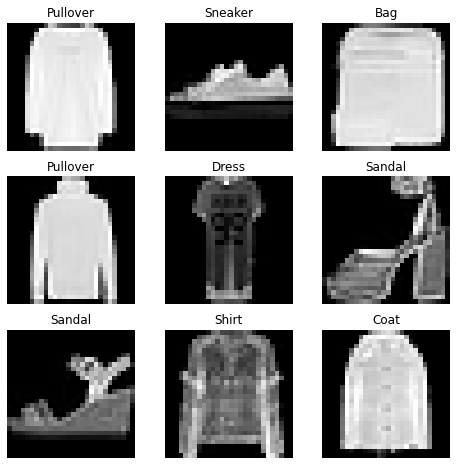

In [29]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

#### Preparando os dados com DataLoaders
---

Ao utilizarmos a classe `Dataset`, podemos obter _features_ e _labels_ de nosso dataset uma amostra de cada vez. Ao treinarmos um modelo, o ideal é que possamos passar amostras em "minilotes"(minibatches), reembaralhando os dados em cada ciclo(epoch) para evitar _overfitting_ no modelo, e usando multiprocessamento para acelerar a obtenção/extração dos dados neste processo.

É preciso, em Machine Learning, especificar quais são as _features_ e _labels_ em nossos datasets. As **_features_** são os inputs (entradas) e as **_labels_** são os outputs (saídas). 

Usamos as _features_ ao treinar o modelo, para tentar estimar e prever as _labels_.

In [30]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

#### Iterando sobre o DataLoader
---

Agora que carregamos os dados do dataset em um `DataLoader`, podemos iterar sobre ele conforme necessário. Cada iteração abaixo retorna um lote (batch) de `train_features` e `train_labels` (contendo _features_ e _labels_ de `batch_size=64`). Por termos especificado `shuffle=True`, os dados serão embaralhados após uma iteração (para um controle mais detalhado sobre a ordem de carregamento dos dados).


Dimensões do lote de features: torch.Size([64, 1, 28, 28])
Dimensões do lote de labels: torch.Size([64])


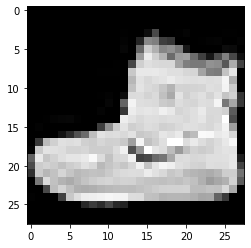

Label: 9


In [101]:
# Exibindo imagens e rótulos:
train_features, train_labels = next(iter(train_dataloader))
print(f"Dimensões do lote de features: {train_features.size()}")
print(f"Dimensões do lote de labels: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

#### Normalização

A normalização é uma técnica comum de pré-processamento que é aplicada para escalonar ou transformar os dados, assegurando assim uma contribuição equitativa de cada _feature_ no treinamento do modelo. Por exemplo, para o nosso modelo, cada pixel possui um valor entre 0 e 255 - nossos _features_. Caso um valor de pixel seja 17 e outro seja 197, pode haver uma distribuição desigual na hora de classificar a importância dos pixels, uma vez que valores maiores poderão exercer influência mais significativa no cálculo do aprendizado do modelo. Para resolver este problema utilizamos a normalização, que consiste em mudar a variância (range) dos dados, sem que isso distorça seu valor proporcional na _feature_ (em caso de dúvidas, leia mais a respeito [aqui](https://medium.com/ipnet-growth-partner/padronizacao-normalizacao-dados-machine-learning-f8f29246c12).)

Executar a normalização dos dados evita redução na precisão do modelo, dificuldade no aprendizado do modelo, e distribuição desfavorável de variâncias (ranges) entre _features_.

#### ToTensor()
---
A função `ToTensor()` converte uma imagem PIL ou `ndarray` NumPy em um `FloatTensor` e escalona a intensidade de pixels da imagem para valores no intervalo [0.,1.].

#### Transformações Lambda
---
As transformações `Lambda` aplicam um _lambda_ qualquer definido pelo usuário. Aqui, definimos uma função que transforma o valor inteiro em um tensor _one-hot encoded_ (leia mais a respeito [aqui](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f).) Inicialmente, criamos um tensor zero de tamanho 10 (o número de _labels_ no dataset) e usamos um _scatter_ que atribui um `value=1` no index conforme dado pela label _y_. Você também pode usar `torch.nn.functional.one_hot` para fazer a mesma coisa.

In [38]:
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

In [39]:
target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))

# Parte 3: Construindo as camadas do modelo

## O que são Redes Neurais?

Redes neurais são uma coleção de neurônios conectados por camadas (layers). Cada neurônio é uma pequena unidade computacional que executa cálculos simples para resolver coletivamente um problema. Os neurônios, por sua vez, são organizados em camadas. Há em redes neurais três tipos de camadas: entrada (input layers), oculta (hidden layers), e saída (output layers). Cada camada contém um número de neurônios, com exceção da camada de entrada. 

Redes neurais tentam imitar a maneira através da qual o cérebro humano processa informação.

![](img/4-model-1.png)

#### Componentes de uma rede neural

- Função de ativação (activation function): determina se um neurônio deve ou não ser ativado. Os cálculos que acontecem em uma rede neural incluem a aplicação de uma função de ativação. Caso um neurônio seja ativado, isso significa que a entrada (input) é significativa. Existem diferentes tipos de funções de ativações. A escolha da função dependerá do tipo de saída (output) desejado. Outra função importante das funções de ativação é a de adicionar não-linearidade ao modelo. Eis abaixo alguns tipos de funções de ativação (leia mais a respeito [aqui](https://iaexpert.academy/2020/05/25/funcoes-de-ativacao-definicao-caracteristicas-e-quando-usar-cada-uma/)):
   - Binário
   - Sigmóide (sigmoid)
   - tanh (tangente hiperbólica)
   - Unidade linear retificada (ReLU)
- Pesos (weights): medidas de influência que determinam quão bem a saída (output) de nossa rede neural se aproximam do valor esperado. Quando uma entrada (input) é passada para um neurônio, ela é multiplicada por um valor (o peso), e a saída resultante é ou observada ou transmitida para a camada seguinte na rede. Pesos para todos os neurônios em uma camada são organizados em um tensor.
- Viés (bias): valor que representa a diferença entre a saída da função de ativação e o valor esperado. Um viés (bias) baixo sugere que a rede neural está inferindo mais (making more assumptions) sobre a forma da saída (output), enquanto um valor alto sugere o contrário.

![](img/4-model-2.png)

É possível afirmar que uma saída (output) _y_ de uma camada em uma rede neural com peso _W_ e viés _b_ seja computada como o somatório das entradas multiplicado pelos pesos e somada com o viés, $x = \sum{(weights * inputs) + bias} $, onde $f(x)$ é a função de ativação.

In [40]:
%matplotlib inline
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

#### Treinando o modelo na GPU

Queremos treinar nosso modelo, se possível, na GPU. Para isso:

In [41]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cuda device


#### Definindo a classe

Definimos nossa rede neural como uma subclasse de `nn.Module`, e inicializamos as camadas(layers) em `__init__`. Cada subclasse de `nn.Module` implementa as operações nos dados de entrada(inputs) no método `forward()`.

Nossa rede neural é composta de:

- Uma camada de entrada (input layer) com 28x28 = 784 features/pixels.
- O primeiro módulo linear, que transforma os 784 features em uma camada oculta (hidden layer) com 512 features.
- Uma função de ativação ReLU, aplicada à essa transformação
- O segundo módulo linear, que transforma os 512 features da primeira camada oculta em outra camada oculta com 512 features.
- Uma função de ativação ReLU, aplicada à essa transformação
- O terceiro módulo linear, que transforma os 512 features da primeira camada oculta em uma camada de saída, com 10 features, correspondentes ao número de classes do modelo.
- Uma função de ativação ReLU, aplicada à essa transformação

In [102]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

Criamos então uma instância da classe `NeuralNetwork`, e a movemos para o `device`, imprimindo a seguir sua estrutura.

In [43]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


Para usar o modelo, passamos os dados de entrada. Essa operação executa o `forward()` do modelo, além de algumas outras operações internas adicionais. É importante ressaltar que nós **não chamamos `model.forward()` diretamente!** 

Ao chamarmos o modelo com os dados de entrada(input), temos como retorno (output) um tensor com 10 dimensões com os valores brutos de previsão para cada classe.

As densidades da previsão são obtidas ao passar os dados para uma instância de `nn.Softmax`

In [48]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X) 
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Classe prevista: {y_pred}")

Classe predita: tensor([3], device='cuda:0')


#### Pesos e viéses

O módulo `nn.Linear` inicializa aleatoriamente os pesos (weights) e viéses (biases) para cada camada (layer) e armazena internamente os valores em tensores.

In [49]:
print(f"Pesos lineares iniciais: {model.linear_relu_stack[0].weight} \n")

print(f"Viéses(Biases) lineares iniciais: {model.linear_relu_stack[0].bias} \n")

Pesos lineares iniciais: Parameter containing:
tensor([[ 0.0162,  0.0327,  0.0261,  ...,  0.0062, -0.0150, -0.0182],
        [-0.0253, -0.0073, -0.0021,  ...,  0.0187, -0.0251, -0.0011],
        [ 0.0027,  0.0209, -0.0203,  ...,  0.0116, -0.0079, -0.0002],
        ...,
        [-0.0187,  0.0108, -0.0177,  ...,  0.0232,  0.0088,  0.0308],
        [ 0.0094, -0.0318, -0.0020,  ..., -0.0191, -0.0179, -0.0302],
        [-0.0115, -0.0029,  0.0161,  ...,  0.0053,  0.0195,  0.0322]],
       device='cuda:0', requires_grad=True) 

Viéses(Biases) lineares iniciais: Parameter containing:
tensor([-0.0025, -0.0145, -0.0120,  0.0251,  0.0296, -0.0185,  0.0253,  0.0272,
         0.0220, -0.0169,  0.0234, -0.0278,  0.0341,  0.0153, -0.0077,  0.0145,
         0.0044, -0.0119,  0.0107,  0.0355, -0.0335,  0.0107, -0.0348, -0.0021,
        -0.0302, -0.0237, -0.0214, -0.0062,  0.0036, -0.0065, -0.0231,  0.0224,
         0.0185, -0.0309, -0.0039,  0.0330,  0.0339,  0.0344,  0.0281,  0.0051,
        -0.0120, 

#### Camadas do modelo
Podemos subdividir as camadas (layers) no modelo FashionMNIST. Para ilustrar, tomaremos um minilote com 3 imagens de dimensões 28x28 e ver o que acontece ao passarmos este lote pela rede neural:

In [50]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


#### nn.Flatten

Inicializamos a camada `nn.Flatten` para converter cada imagem 2D 28x28 em um vetor contíguo de 784 valores de pixels (a dimensão do minilote (em dim=0) é mantida). Cada um dos pixels é passado para a camada de entrada (input layer) da rede neural.

![](img/4-model-3.png)

In [51]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


#### nn.Linear

A camada linear é um módulo que aplica uma transformação linear sobre a entrada, usando os valores de pesos e viéses armazenados internamente. O valor da escala de cinza (grayscale) de cada pixel no layer de entrada será conectado a neurônios na camada oculta, para cálculo. O cálculo utilizado para esta transformação é ${{weight * input + bias}} $.

In [52]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


#### nn.ReLU

Ativações não-lineares são o que criam os mapeamentos complexos entre as entradas e saídas no modelo. Elas são aplicadas após as transformações lineares, para introduzir um caráter não-linear, ajudando assim as redes neurais no aprendizado de uma vasta gama de fenômenos. Neste modelo, usamos a função ReLU entre nossas camadas lineares, mas é possível utilizar outros tipos de função.

_Grosso modo_, a função ReLU toma as saídas obtidas das camadas lineares e substitui valores negativos por zeros.

Saída linear: ${ x = {weight * input + bias}} $.  
ReLU:  $f(x)= 
\begin{cases}
    0, & \text{se } x < 0\\
    x, & \text{se } x\geq 0\\
\end{cases}
$

In [53]:
print(f"Antes do ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"Após o ReLU: {hidden1}")

Antes do ReLU: tensor([[ 0.3604, -0.2009, -0.3886,  0.9744, -0.6400,  0.0529,  0.3926,  0.6914,
          0.8556, -0.4389, -0.1389,  0.2455,  0.4574, -0.3184, -0.0082,  0.1711,
          0.0577, -0.3324, -0.0511,  0.4725],
        [ 0.1516, -0.2313,  0.0956,  0.6419, -0.6327, -0.2557,  0.1251,  0.5334,
          0.4880, -0.3627, -0.1748,  0.4976,  0.3014, -0.1473, -0.2936,  0.1207,
         -0.0813, -0.4212, -0.0539,  0.5298],
        [-0.0735, -0.2377,  0.0401,  0.7120, -0.4083, -0.1277,  0.1128,  0.6469,
          0.8215, -0.1541, -0.3085,  0.6231,  0.0187, -0.3728, -0.0701,  0.0845,
          0.3681, -0.3262, -0.0114,  0.5757]], grad_fn=<AddmmBackward0>)


Após o ReLU: tensor([[0.3604, 0.0000, 0.0000, 0.9744, 0.0000, 0.0529, 0.3926, 0.6914, 0.8556,
         0.0000, 0.0000, 0.2455, 0.4574, 0.0000, 0.0000, 0.1711, 0.0577, 0.0000,
         0.0000, 0.4725],
        [0.1516, 0.0000, 0.0956, 0.6419, 0.0000, 0.0000, 0.1251, 0.5334, 0.4880,
         0.0000, 0.0000, 0.4976, 0.3014, 0.0000, 0

#### nn.Sequential

O `nn.Sequential` é um contêiner ordenado de módulos. Os dados são passados por todos os módulos na ordem definida. É possível utilizar contêineres em sequência para montar uma rede rápida como `seq.modules`

In [54]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

#### nn.Softmax

A última camada linear da rede neural retorna valores `logits` brutos no intervalo [`-infty`, `infty`], que são passados em seguida para o módulo `nn.Softmax`. A função de ativação Softmax é usada para calcular a probabilidade da saída da rede neural. Ela é apenas utilizada na camada de saída de uma rede neural. Os resultados são, então, escalonados para o intervalo [0,1], representando as densidades previstas para cada classe do modelo. O parâmetro `dim` indica a dimensão através da qual os valores dos resultados, somados, devem resultar em 1. O _node_ com a maior probabilidade então é o que prevê a saída desejada.

![](img/4-model-4.png)

In [55]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

#### Parâmetros do modelo

Muitas camadas dentro de uma rede neural são parametrizadas, isto é, possuem valores de pesos e viéses associados que são optimizados durante o processo do treinamento do modelo. Ao criar uma subclasse de `nn.Module` é possível rastrear automaticamente todos os campos definidos dentro de seu modelo, e permite acessar os parâmetros por meio dos métodos `parameters()` ou `named_parameters()`.

No exemplo a seguir, iteramos sobre todos os parâmetros, e imprimimos a dimensão e uma previsão de seus valores.

In [56]:
print("Estrutura do modelo: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Camada: {name} | Dimensão: {param.size()} | Valores : {param[:2]} \n")

Estrutura do modelo:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
) 


Camada: linear_relu_stack.0.weight | Dimensão: torch.Size([512, 784]) | Valores : tensor([[ 0.0162,  0.0327,  0.0261,  ...,  0.0062, -0.0150, -0.0182],
        [-0.0253, -0.0073, -0.0021,  ...,  0.0187, -0.0251, -0.0011]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

Camada: linear_relu_stack.0.bias | Dimensão: torch.Size([512]) | Valores : tensor([-0.0025, -0.0145], device='cuda:0', grad_fn=<SliceBackward0>) 

Camada: linear_relu_stack.2.weight | Dimensão: torch.Size([512, 512]) | Valores : tensor([[-0.0022,  0.0102,  0.0383,  ..., -0.0177, -0.0194, -0.0326],
        [ 0.0152, -0.0040,  0.0315,  ...,  0.0339, -0.0424, -0.003

# Parte 4: Diferenciação automática

In [57]:
%matplotlib inline
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [59]:
print('Função gradiente para z =',z.grad_fn)
print('Função gradiente para a perda =', loss.grad_fn)

Função gradiente para z = <AddBackward0 object at 0x7effb98153d0>
Função gradiente para a perda = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7effb981cdc0>


In [60]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.1175, 0.2707, 0.0003],
        [0.1175, 0.2707, 0.0003],
        [0.1175, 0.2707, 0.0003],
        [0.1175, 0.2707, 0.0003],
        [0.1175, 0.2707, 0.0003]])
tensor([0.1175, 0.2707, 0.0003])


In [61]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


In [62]:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

False


In [64]:
inp = torch.eye(5, requires_grad=True)
out = (inp+1).pow(2)
out.backward(torch.ones_like(inp), retain_graph=True)
print("Primeira execução\n", inp.grad)
out.backward(torch.ones_like(inp), retain_graph=True)
print("\nSegunda execução\n", inp.grad)
inp.grad.zero_()
out.backward(torch.ones_like(inp), retain_graph=True)
print("\nExecução após zerar gradientes\n", inp.grad)

Primeira execução
 tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.],
        [2., 2., 2., 2., 4.]])

Segunda execução
 tensor([[8., 4., 4., 4., 4.],
        [4., 8., 4., 4., 4.],
        [4., 4., 8., 4., 4.],
        [4., 4., 4., 8., 4.],
        [4., 4., 4., 4., 8.]])

Execução após zerar gradientes
 tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.],
        [2., 2., 2., 2., 4.]])


# Parte 5: Aprendendo sobre o loop de optimização

In [65]:
%matplotlib inline
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

In [66]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [67]:
# Inicializando a loss function
loss_fn = nn.CrossEntropyLoss()

In [68]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [69]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):        
        # Computa a previsão e a perda
        pred = model(X)
        loss = loss_fn(pred, y)
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            
    test_loss /= size
    correct /= size
    print(f"Erro no teste: \n Precisão: {(100*correct):>0.1f}%, Perda média: {test_loss:>8f} \n")

In [70]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Fim!")

Epoch 1
-------------------------------
loss: 2.307655  [    0/60000]
loss: 2.296285  [ 6400/60000]
loss: 2.280057  [12800/60000]
loss: 2.276619  [19200/60000]
loss: 2.253632  [25600/60000]
loss: 2.247976  [32000/60000]
loss: 2.253484  [38400/60000]
loss: 2.235549  [44800/60000]
loss: 2.233183  [51200/60000]
loss: 2.197762  [57600/60000]
Erro no teste: 
 Precisão: 46.1%, Perda média: 0.034616 

Epoch 2
-------------------------------
loss: 2.216839  [    0/60000]
loss: 2.188782  [ 6400/60000]
loss: 2.160083  [12800/60000]
loss: 2.185682  [19200/60000]
loss: 2.120147  [25600/60000]
loss: 2.110475  [32000/60000]
loss: 2.145373  [38400/60000]
loss: 2.105047  [44800/60000]
loss: 2.116391  [51200/60000]
loss: 2.043687  [57600/60000]
Erro no teste: 
 Precisão: 46.8%, Perda média: 0.032389 

Epoch 3
-------------------------------
loss: 2.081988  [    0/60000]
loss: 2.021157  [ 6400/60000]
loss: 1.979194  [12800/60000]
loss: 2.047880  [19200/60000]
loss: 1.925187  [25600/60000]
loss: 1.926949

In [71]:
torch.save(model.state_dict(), "data/model.pth")

print("Modelo salvo em model.pth.")

Modelo salvo em model.pth.


# Parte 6: Carregando e executando as previsões do modelo

In [73]:
%matplotlib inline
import torch
import onnxruntime
from torch import nn
import torch.onnx as onnx
import torchvision.models as models
from torchvision import datasets
from torchvision.transforms import ToTensor

In [74]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [75]:
model = NeuralNetwork()
model.load_state_dict(torch.load('data/model.pth'))
model.eval()

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)

In [76]:
input_image = torch.zeros((1,28,28))
onnx_model = 'data/model.onnx'
onnx.export(model, input_image, onnx_model)

In [77]:
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]
x, y = test_data[0][0], test_data[0][1]

In [81]:
session = onnxruntime.InferenceSession(onnx_model, providers=['CUDAExecutionProvider'])
input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name

result = session.run([output_name], {input_name: x.numpy()})
predicted, actual = classes[result[0][0].argmax(0)], classes[y]
print(f'Previsto: "{predicted}", Atual: "{actual}"')

Previsto: "Ankle boot", Atual: "Ankle boot"


# Parte 7: O processo completo de construção do modelo

Vamos agora resumir todo o processo, executando as etapas em sequência para uma compreensão mais holística de como funciona a criação e a execução do modelo.

In [82]:
%matplotlib inline
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt

In [83]:
# Baixando dados de treino do dataset:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Baixando dados de teste do dataset:
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

Shape of X [N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64


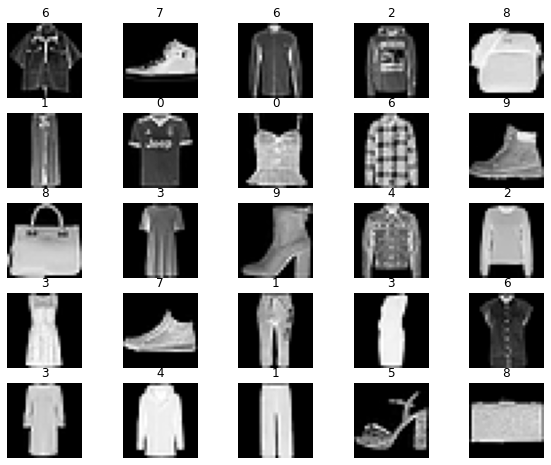

In [84]:
batch_size = 64

# Criando os DataLoaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break
    
# Mostrando exemplos dos dados
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    idx = torch.randint(len(test_data), size=(1,)).item()
    img, label = test_data[idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [87]:
# Escolhendo o dispositivo de treino:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Usando {device}.")

# Definindo o modelo
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Usando cuda.
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


In [88]:
# Optimizando os parâmetros do modelo

loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-3
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [89]:
# Treinando o modelo
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        
        # Calculando o erro nas previsões
        pred = model(X)
        loss = loss_fn(pred, y)
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [90]:
# Testando o desempenho do modelo para verificar sua eficiência
def test(dataloader, model):
    size = len(dataloader.dataset)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= size
    correct /= size
    print(f"Erros no teste: \n Previsão: {(100*correct):>0.1f}%, Perda média: {test_loss:>8f} \n")

In [91]:
# Vamos executar em 15 ciclos. 
epochs = 15
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model)
print("Fim!")

Epoch 1
-------------------------------
loss: 2.297367  [    0/60000]
loss: 2.293564  [ 6400/60000]
loss: 2.275012  [12800/60000]
loss: 2.283568  [19200/60000]
loss: 2.278128  [25600/60000]
loss: 2.257450  [32000/60000]
loss: 2.246504  [38400/60000]
loss: 2.227202  [44800/60000]
loss: 2.236900  [51200/60000]
loss: 2.219619  [57600/60000]
Erros no teste: 
 Previsão: 43.0%, Perda média: 0.034885 

Epoch 2
-------------------------------
loss: 2.214786  [    0/60000]
loss: 2.226838  [ 6400/60000]
loss: 2.179623  [12800/60000]
loss: 2.199891  [19200/60000]
loss: 2.184374  [25600/60000]
loss: 2.150620  [32000/60000]
loss: 2.126430  [38400/60000]
loss: 2.091466  [44800/60000]
loss: 2.127749  [51200/60000]
loss: 2.078912  [57600/60000]
Erros no teste: 
 Previsão: 42.4%, Perda média: 0.032942 

Epoch 3
-------------------------------
loss: 2.088279  [    0/60000]
loss: 2.114778  [ 6400/60000]
loss: 2.020396  [12800/60000]
loss: 2.063795  [19200/60000]
loss: 2.029534  [25600/60000]
loss: 1.9846

In [94]:
# É possível salvar o modelo
torch.save(model.state_dict(), "data/model.pth")
print("Modelo salvo em model.pth")

Modelo salvo em model.pth


In [93]:
# E carregar modelos salvos
model = NeuralNetwork()
model.load_state_dict(torch.load("data/model.pth"))

<All keys matched successfully>

In [95]:
# E em seguida, utilizar um modelo salvo para efetuar previsões.
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"
